In [42]:
# Import necessary libraries
import pandas as pd # pd is user for data manipulation
import numpy as np # np is used for numerical operations
import matplotlib.pyplot as plt # plt is used for plotting
import seaborn as sns # sns is used for statistical data visualization
from scipy.stats import skew # skew is used to calculate the skewness of a distribution
from scipy.stats import zscore # zscore is used to calculate the z-score of a distribution

In [43]:
df=pd.read_csv('./dataset.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [44]:
df = df.rename(columns = {
    "race/ethnicity": "race",
    "parental level of education": "parent_edu",
    "test preparation course": "test_course",
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"
})
df.head()

,gender,race,parent_edu,lunch,test_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



# Scan all variables for missing values and inconsistencies.

In [45]:

df.isnull().sum()

# Check for missing values
def handle_missing(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype == 'object':
                df[col] = df[col].fillna('Unknown')
            else:
                df[col] = df[col].fillna(df[col].median()) 
    return df
df = handle_missing(df)


In [46]:
df.duplicated().sum()
def remove_duplicates(df):
    df = df.drop_duplicates()
    return df
df = remove_duplicates(df)

# Dealing with Outliers


<Axes: ylabel='writing_score'>

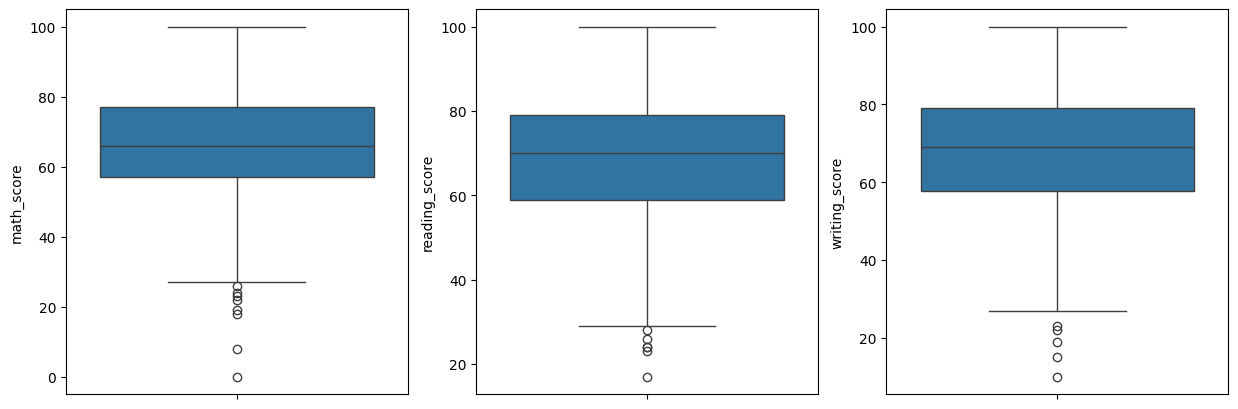

In [47]:
fig,axes = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(data=df["math_score"], ax=axes[0])
sns.boxplot(data=df["reading_score"], ax=axes[1])
sns.boxplot(data=df["writing_score"], ax=axes[2])

<Axes: ylabel='math_score'>

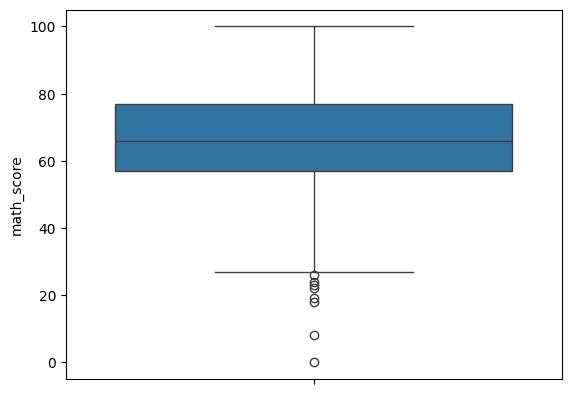

In [48]:
sns.boxplot(data=df["math_score"])

In [49]:
# Skewness before outlier removal
skewness_before = skew(df['math_score'])
print(f"Skewness of 'math score' before outlier removal: {skewness_before:.4f}")

Skewness of 'math score' before outlier removal: -0.2785


In [50]:
def remove_outliers_iqr(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] >= q1 - 1.5 * iqr) & (df[col] <= q3 + 1.5 * iqr)]


In [51]:
def remove_outliers_z(df, col):
    z = zscore(df[col])
    return df[(z > -3) & (z < 3)]

df = remove_outliers_z(df, 'math_score')

<Axes: ylabel='math_score'>

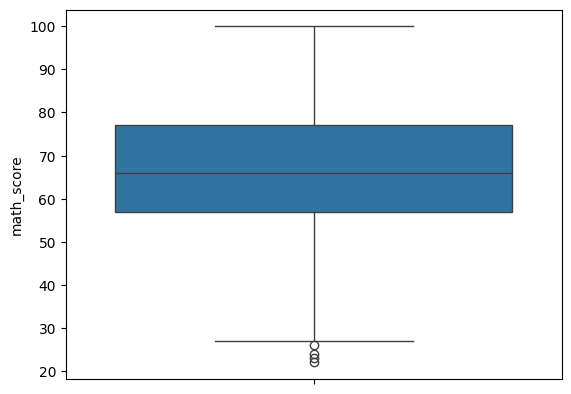

In [52]:
sns.boxplot(data=df["math_score"])

In [53]:
df=remove_outliers_iqr(df, 'math_score')
# df=remove_outliers_iqr(df, 'reading_score')
# df=remove_outliers_iqr(df, 'writing_score')

<Axes: ylabel='math_score'>

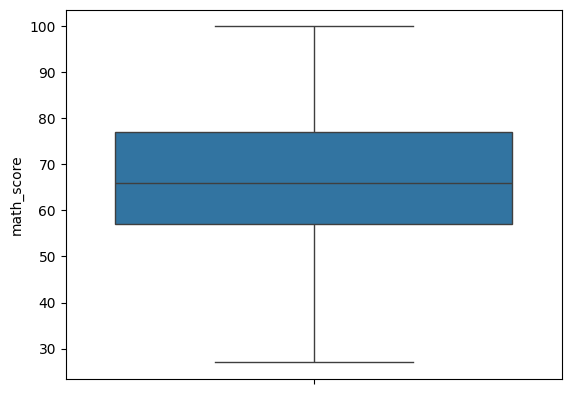

In [54]:
sns.boxplot(data=df["math_score"])

# Log Transformation

In [ ]:
# Step 1: Check skewness
skew_before = df['math_score'].skew()
print(f"Skewness before transformation: {skew_before}")

# Step 2: Apply log transformation 
df['math score log'] = np.log1p(df['math_score'])  

# Step 3: Check skewness of the 'math score log' column after transformation
skew_after = df['math score log'].skew()
print(f"Skewness after log transformation: {skew_after}")


Skewness before transformation: -0.06930576171107476
Skewness after log transformation: -0.7129061735186374


In [ ]:
# Step 1: Calculate Pearson's Skewness Coefficient for the 'math score' column before transformation
mean_before = df['math score'].mean()
median_before = df['math score'].median()
std_dev_before = df['math score'].std()

# Calculate Pearson's Skewness Coefficient before transformation
pearson_skewness_before = 3 * (mean_before - median_before) / std_dev_before
print(f"Pearson's Skewness Coefficient before transformation: {pearson_skewness_before}")

# Step 2: Apply log transformation to the 'math score' column
df['math score log'] = np.log1p(df['math score'])  

# Step 3: Calculate Pearson's Skewness Coefficient after transformation
mean_after = df['math score log'].mean()
median_after = df['math score log'].median()
std_dev_after = df['math score log'].std()

# Calculate Pearson's Skewness Coefficient after transformation
pearson_skewness_after = 3 * (mean_after - median_after) / std_dev_after
print(f"Pearson's Skewness Coefficient after log transformation: {pearson_skewness_after}")

Pearson's Skewness Coefficient before transformation: 0.09907557667813464
Pearson's Skewness Coefficient after log transformation: -0.23490586684824508


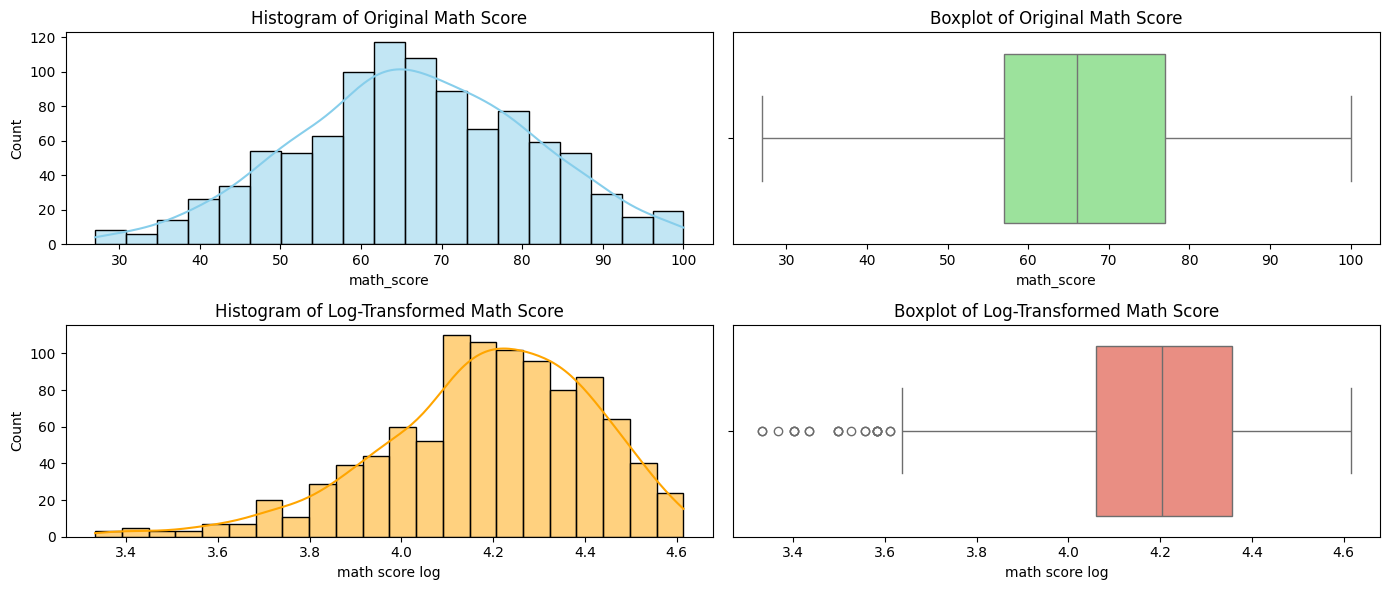

In [59]:
# Plotting the histograms and boxplots

# Set up the figure for side-by-side plots
plt.figure(figsize=(14, 6))

# Plot the histogram and boxplot for original 'math score'
plt.subplot(2, 2, 1)
sns.histplot(df['math_score'], kde=True, color='skyblue')
plt.title('Histogram of Original Math Score')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['math_score'], color='lightgreen')
plt.title('Boxplot of Original Math Score')

# Plot the histogram and boxplot for transformed 'math score log'
plt.subplot(2, 2, 3)
sns.histplot(df['math score log'], kde=True, color='orange')
plt.title('Histogram of Log-Transformed Math Score')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['math score log'], color='salmon')
plt.title('Boxplot of Log-Transformed Math Score')

# Show the plots
plt.tight_layout()
plt.show()
